In [15]:
import pandas as pd
import os

# Create a list of all CSV filenames
years = ['2020', '2021', '2022', '2023', '2024']
file_names = [f'{year}.csv' for year in years]

# Load and combine all CSVs
df_list = []
for year, file in zip(years, file_names):
    temp_df = pd.read_csv(file)
    temp_df['year'] = int(year)  # Add a 'year' column
    df_list.append(temp_df)

# Combine all into one DataFrame
df = pd.concat(df_list, ignore_index=True)
print("Combined Data Shape:", df.shape)


Combined Data Shape: (728, 12)


In [16]:
# Step 2: Data Cleaning
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Unify happiness score column name
for alt in ['ladder_score', 'score']:
    if alt in df.columns:
        df.rename(columns={alt: 'happiness_score'}, inplace=True)

# Drop duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print("✅ Data Cleaned:", df.shape)


✅ Data Cleaned: (724, 12)


In [17]:
# Step 3: Data Reduction (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features for PCA (exclude 'year')
numeric_df = df.select_dtypes(include='number').drop(columns=['year'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA (2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add to DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

print("✅ PCA Completed. Explained variance:", pca.explained_variance_ratio_)


✅ PCA Completed. Explained variance: [0.61553714 0.11850628]


In [18]:
# Step 4: Data Transformation
from sklearn.preprocessing import MinMaxScaler

# 🔁 Normalization (Min-Max Scaling)
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(numeric_df)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_df.columns)

# 🔢 Discretization of happiness_score
df['happiness_level'] = pd.cut(df['happiness_score'], bins=3, labels=["Low", "Medium", "High"])

print("✅ Normalization and Discretization done")


✅ Normalization and Discretization done


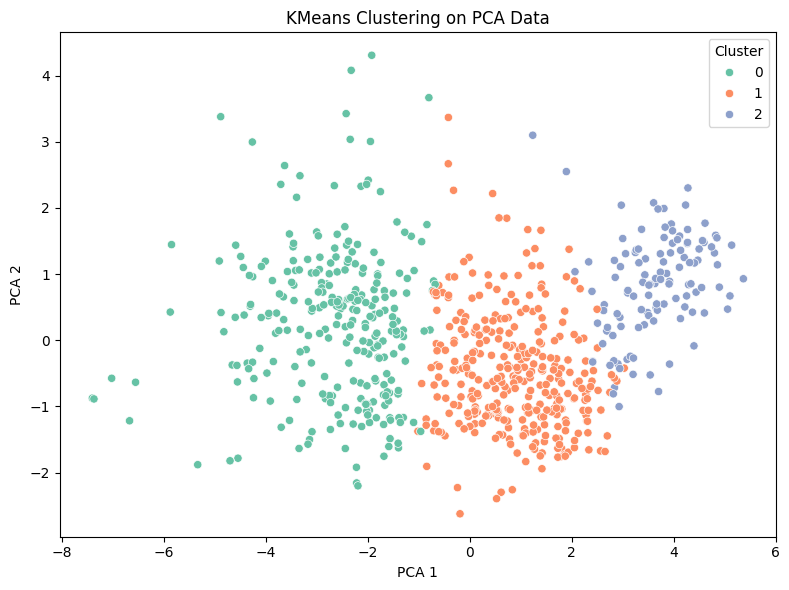

✅ Clustering done and plotted.


In [19]:
# Step 5: Data Mining (Clustering)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("KMeans Clustering on PCA Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("screenshot.png")  # Save the plot
plt.show()

print("✅ Clustering done and plotted.")
